# Buliding Classic Machine Learning Model

                                                                                    Code Wrritten By : Dasari Mohana

In [2]:
# Importing neccesary libraries
import numpy as np
import pandas as pd

## Reading the train and test data ( Created after EDA)

In [3]:
train = pd.read_csv('UCI_HAR_dataset/csv_files/train.csv')
test = pd.read_csv('UCI_HAR_dataset/csv_files/test.csv')
print('Train shape:',train.shape)
print('Test shape:',test.shape)

Train shape: (7352, 564)
Test shape: (2947, 564)


In [4]:
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [5]:
test.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [6]:
#  Extracting X_train and y_train from train.csv file

X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [7]:
# Extracting X_test and y_test from test.csv file

X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [8]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


### Labels that are useful in plotting confusion matrix

In [9]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

### Function to plot the confusion matrix

In [10]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Generic function to run any model specified

In [11]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

### Method to print the Gridsearch Attributes

In [12]:
def print_grid_search_attributes(model):
    
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

### Since this is a Multi Class Classification problem, we use ML classifiers

# 1. Logistic Regression with Grid Search

training the model..
Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.91458247        nan 0.93416876        nan 0.93716156        nan
 0.93403203        nan]
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Done 
 

training_time(HH:MM:SS.ms) - 0:01:03.668181


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.049969


---------------------
|      Accuracy      |
---------------------

    0.9582626399728538


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 429  59   0   0   3]
 [  0  16 516   0   0   0]
 [  0   0   0 492   3   1]
 [  0   0   0   4 403  13]
 [  0   0   0  23   1 447]]


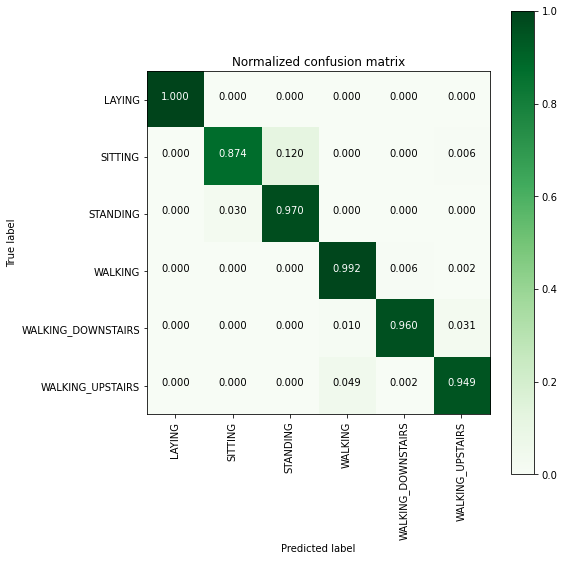

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.87      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [13]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10], 'penalty':['l2','l1']}

# Defining Log- Regression model
log_reg = linear_model.LogisticRegression(random_state=23)

log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)

log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [14]:
# Best parameters
print_grid_search_attributes(log_reg_grid)

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=1, random_state=23)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 1, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9371615639319785



#  2. Linear SVC with GridSearch

training the model..
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Done 
 

training_time(HH:MM:SS.ms) - 0:02:02.456469


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.073954


---------------------
|      Accuracy      |
---------------------

    0.9633525619273838


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  1 433  53   0   0   4]
 [  0  13 517   2   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   3 410   7]
 [  0   0   0  24   0 447]]


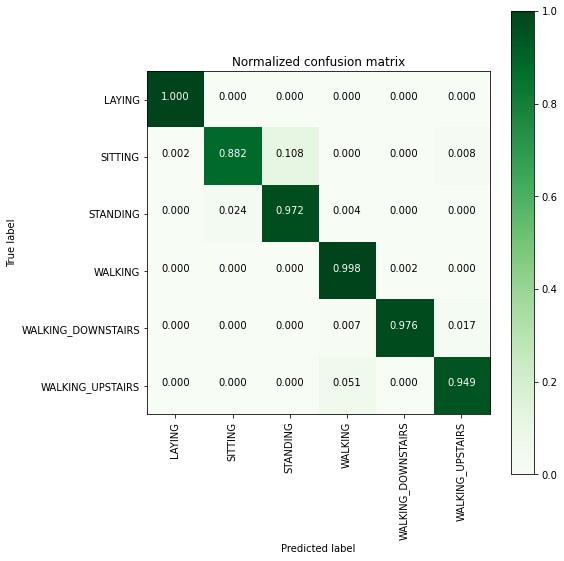

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.88      0.92       491
          STANDING       0.91      0.97      0.94       532
           WALKING       0.94      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [15]:
from sklearn.svm import LinearSVC

parameters = {'C':[0.01, 0.1, 1, 10]}

lr_svc = LinearSVC(random_state=23)

lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)

lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [16]:
# Best parameters
print_grid_search_attributes(lr_svc_grid)

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=0.1, random_state=23)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.1}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.940840004254591



# 3.  Kernel SVM with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:31:30.322792


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:06.641715


---------------------
|      Accuracy      |
---------------------

    0.9602986087546658


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 440  49   0   0   2]
 [  0  19 513   0   0   0]
 [  0   0   0 493   2   1]
 [  0   0   0   4 396  20]
 [  0   0   0  20   0 451]]


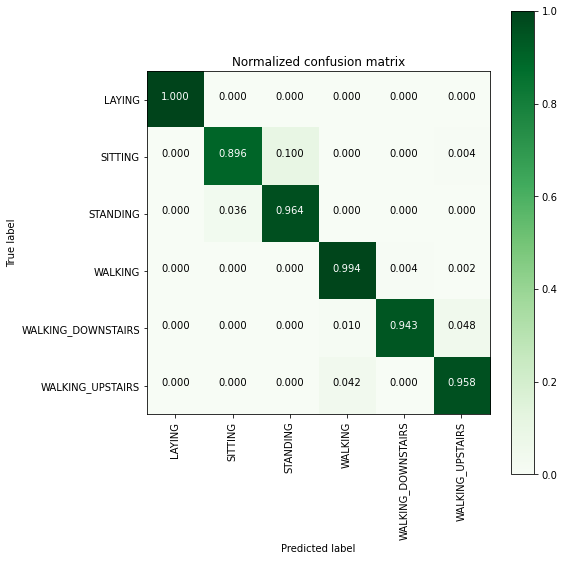

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.90      0.93       491
          STANDING       0.91      0.96      0.94       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.94      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [17]:
from sklearn.svm import SVC
parameters = {'C':[0.1, 1, 10, 20, 30], 'gamma': [0.001, 0.1, 1]}

rbf_svm = SVC(kernel='rbf')

rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [18]:
print_grid_search_attributes(rbf_svm_grid)

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=30, gamma=0.001)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 30, 'gamma': 0.001}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.938799372910279



# 4. Decision Trees with GridSearchCV

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:56.040491


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.031251


---------------------
|      Accuracy      |
---------------------

    0.842212419409569


--------------------
| Confusion Matrix |
--------------------

 [[535   2   0   0   0   0]
 [  3 408  80   0   0   0]
 [  1  84 447   0   0   0]
 [  0   0   0 456  32   8]
 [  0   0   0  62 322  36]
 [  0   0   0 111  46 314]]


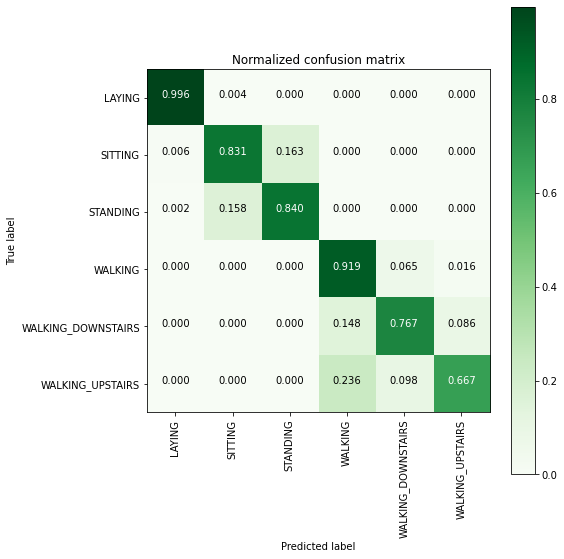

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       0.99      1.00      0.99       537
           SITTING       0.83      0.83      0.83       491
          STANDING       0.85      0.84      0.84       532
           WALKING       0.72      0.92      0.81       496
WALKING_DOWNSTAIRS       0.81      0.77      0.79       420
  WALKING_UPSTAIRS       0.88      0.67      0.76       471

          accuracy                           0.84      2947
         macro avg       0.85      0.84      0.84      2947
      weighted avg       0.85      0.84      0.84      2947

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(max_depth=9, max_features='auto', random_state=23)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'criterion': 'gini', 'max_depth': 9, 'max_f

In [19]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'max_depth':np.arange(0,20,5)}

dt = DecisionTreeClassifier(random_state=23)

dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)

dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)

print_grid_search_attributes(dt_grid)

# 5. Random Forest Classifier with GridSearch

training the model..


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.90588086 0.90805616 0.91594537 0.91676105
 0.91839408 0.91907407]
  warnings.warn(


Done 
 

training_time(HH:MM:SS.ms) - 0:06:54.515866


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.313805


---------------------
|      Accuracy      |
---------------------

    0.9273837801153716


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 435  56   0   0   0]
 [  0  44 488   0   0   0]
 [  0   0   0 481   6   9]
 [  0   0   0  18 359  43]
 [  0   0   0  32   6 433]]


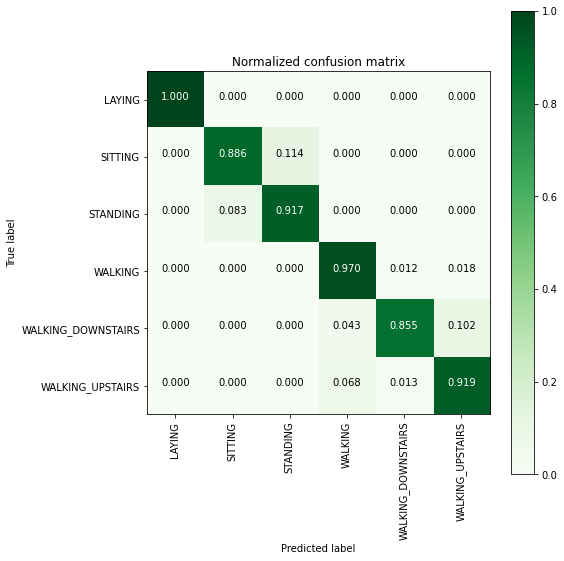

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.89      0.90       491
          STANDING       0.90      0.92      0.91       532
           WALKING       0.91      0.97      0.94       496
WALKING_DOWNSTAIRS       0.97      0.85      0.91       420
  WALKING_UPSTAIRS       0.89      0.92      0.91       471

          accuracy                           0.93      2947
         macro avg       0.93      0.92      0.93      2947
      weighted avg       0.93      0.93      0.93      2947

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(max_depth=15, n_estimators=200, random_state=23)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 15, 'n_estimators': 200}

------

In [20]:
from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators': [100,200], 'max_depth':np.arange(0,20,5)}

rfc = RandomForestClassifier(random_state=23)

rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)

rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

print_grid_search_attributes(rfc_grid_results['model'])


# Comparing all models

In [21]:
print('\nClassifier          Accuracy      Error')
print(' --------------      ----------   --------')
print('Logistic Regression : {:.04}%      {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%      {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))


Classifier          Accuracy      Error
 --------------      ----------   --------
Logistic Regression : 95.83%      4.174%
Linear SVC          : 96.34%      3.665% 
rbf SVM classifier  : 96.03%      3.97% 
DecisionTree        : 84.22%      15.78% 
Random Forest       : 92.74%      7.262% 


#### Observation:
We can choose Logistic regression or Linear SVC or rbf kernal - SVM

# Conclusion

1. I have built different predicting models using Logistic regression, Support vector Classifer, Kernal Based SVM, Decision tree Classifier and Random Forest classifier.

2. We have also seen how to systematically improve a model by fine tuning the Hyper parameters using Grid Search.

3. Of all classifiers Logistic Regression, Linear SVC and Rbf Kernal SVM perform well compare to tree type classifiers